# Prosper Loan Data

## Investigation Overview
In this investigation, I wanted to look at the characteristics of loans from Prosper that could be used to predict their Annual Percentage Rates (APRs). The main features studied to predict APRs were: Duration of the loan, loan category, borrower rate, lender yield, occupation, stated income, employment status, employment duration, and the date of creation of the loan.

## Dataset Overview
The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 8,952 data points (less than 8%) were removed from the analysis due to inconsistencies or missing information. Only 12 variables remained in the dataset for the exploration and analysis of this study.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("wrangled_data.csv")

In [7]:
# Cleaning tasks
df["ListingCreationDate"] = pd.to_datetime(df["ListingCreationDate"])
df["Term"] = df["Term"].astype(str)
base_color = sb.color_palette()[0]

## Distribution of Annual Percentage Rates (APR)

APRs in the dataset are skewed to the right, with a noticeable peak near the 0.35 range. 

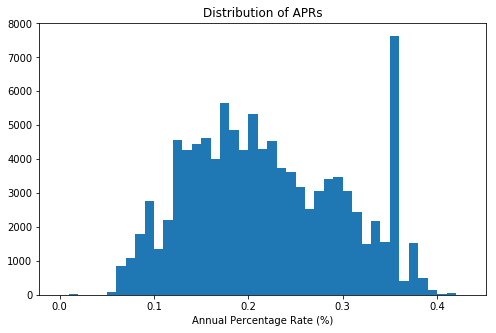

In [4]:
plt.figure(figsize=[8, 5])
plt.title('Distribution of APRs')
plt.hist(df["BorrowerAPR"], bins=np.arange(0, df["BorrowerAPR"].max()+.01, .01));
plt.xlabel('Annual Percentage Rate (%)')
plt.show()

## Distribution of Loans across the years

Loans declined heavily in 2009, and then started growing until they peaked in 2013. From context, my hypothesis is that the 2009 decline in loans is related to the financial crisis of 2008. In the graph, 2014 appears to show a decline. However, it is related to the end of the dataset. 2014 is not a full year, with the last loan ending in March.

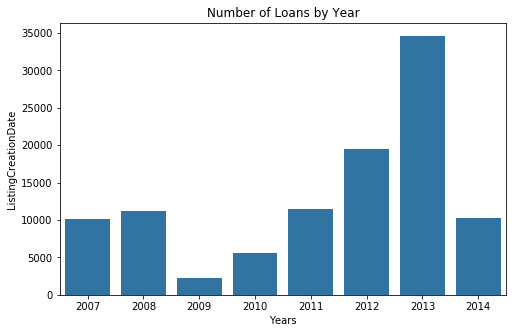

In [11]:
years_data = df.groupby(df["ListingCreationDate"].dt.year).count()
y = years_data["ListingCreationDate"]
x = years_data["ListingCreationDate"].index
plt.figure(figsize=[8, 5]);
sb.barplot(x=x, y=y, color=base_color);
plt.xlabel("Years");
plt.title("Number of Loans by Year");

# APRs vs Numerical Variables

APRs have little to no correlation to most variables. There is a high correlation between APRs and Borrower Rates and Lender Yield. This is to be expected. APRs are made up of the Borrower Rates plus fees. The Lender Yield is the Bank's gain for lending the loan. 

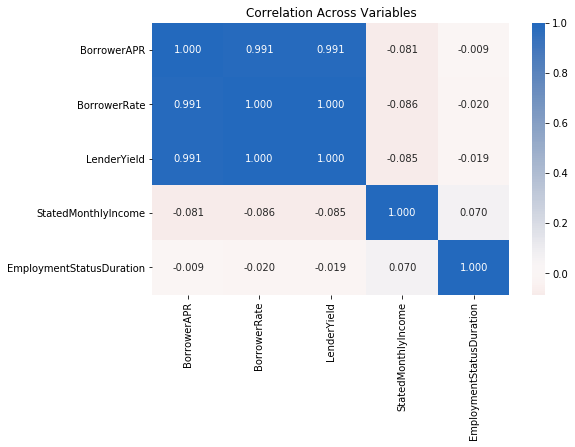

In [39]:
numeric_vars = ["BorrowerAPR", "BorrowerRate", "LenderYield", "StatedMonthlyIncome", "EmploymentStatusDuration"]
categoric_vars = ["LoanStatus", "Category", "Occupation", "EmploymentStatus", "Term"]
# correlation plot
plt.figure(figsize = [8, 5]);
plt.title("Correlation Across Variables");
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

## APRs vs Categorical Variables
### Occupation

One of the highest earners and one of the lowest APR occupations are Doctors. However, being a doctor doesn't correlate with having a lower APR.

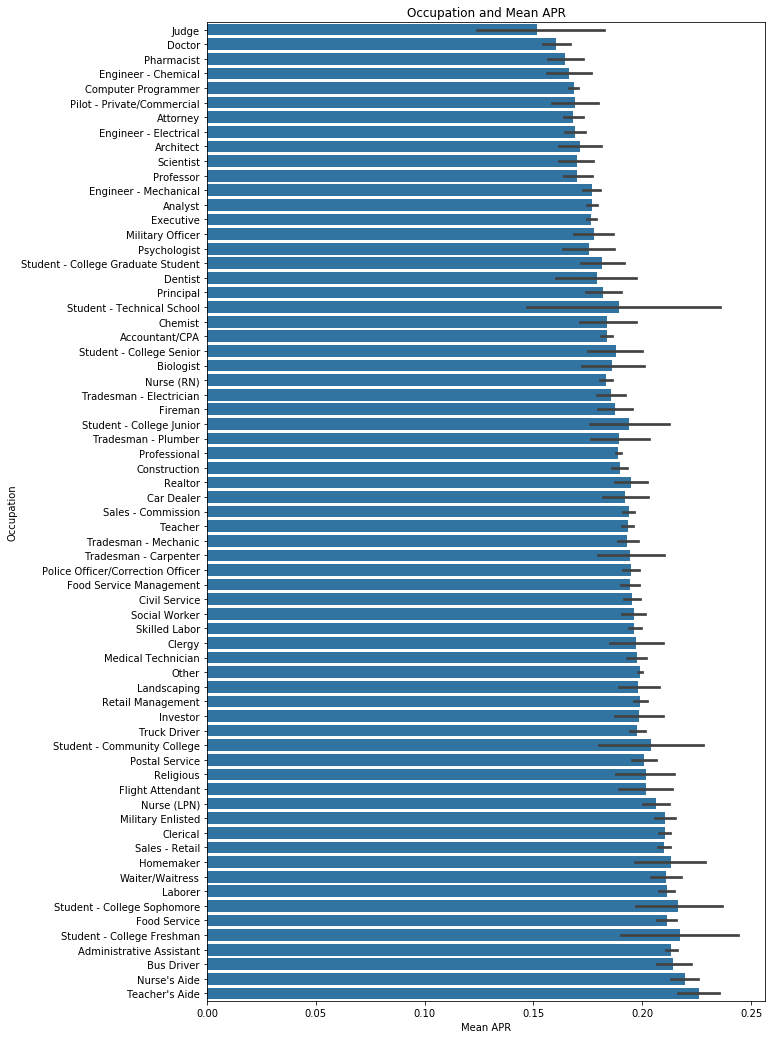

In [22]:
Occ_order = df.groupby("Occupation").mean().sort_values(by="BorrowerAPR").index
fig, ax = plt.subplots(figsize=(10,18));
sb.barplot(data=df, ax=ax, x='BorrowerRate', y='Occupation', color=base_color, order=Occ_order);
plt.title("Occupation and Mean APR");
plt.xlabel("Mean APR");

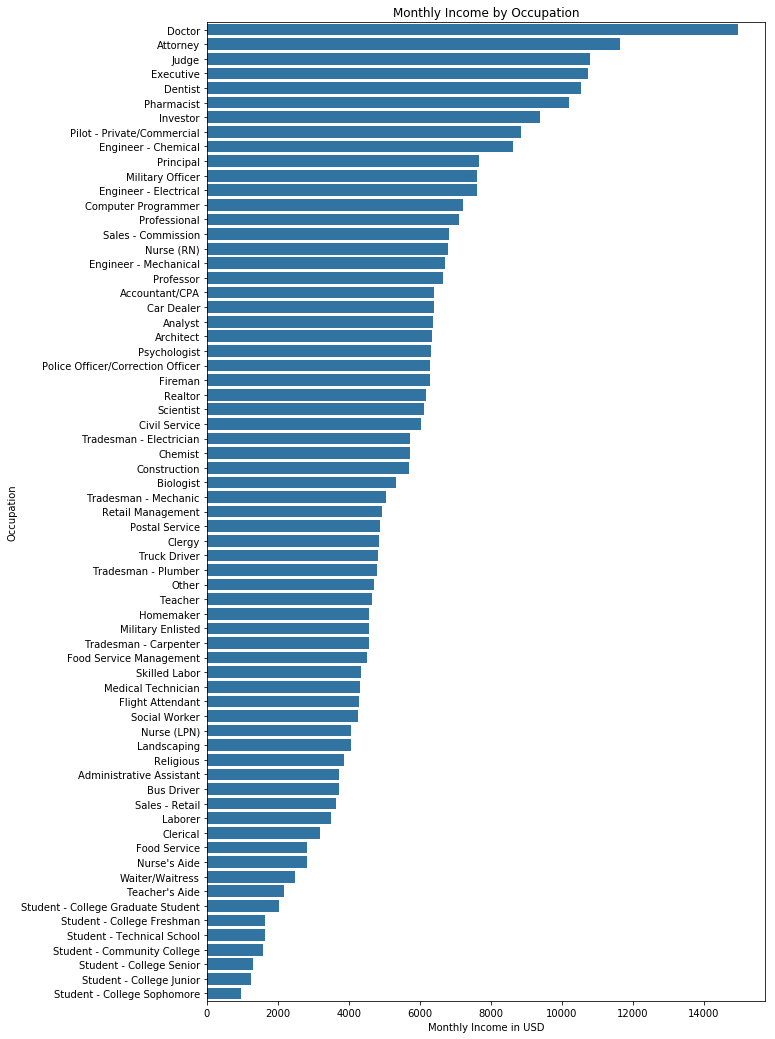

In [29]:
x = df.groupby('Occupation').mean().sort_values(by="StatedMonthlyIncome", ascending=False)["StatedMonthlyIncome"]
y = df.groupby('Occupation').mean().sort_values(by="StatedMonthlyIncome", ascending=False)["StatedMonthlyIncome"].index
fig, ax = plt.subplots(figsize=(10,18));
sb.barplot(ax=ax, data=df, y=y, x=x, color=base_color);
plt.title("Monthly Income by Occupation");
plt.xlabel("Monthly Income in USD");

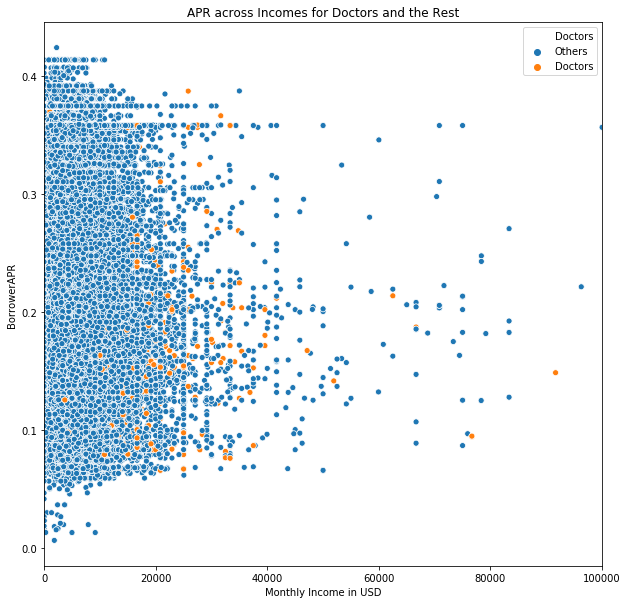

In [33]:
df["Doctors"] = "Others"
index = df.query("Occupation == 'Doctor'").index
df.at[index, "Doctors"] = "Doctors"
fig, ax = plt.subplots(figsize=(10,10));
g = sb.scatterplot(data=df, ax=ax, y='BorrowerAPR', x='StatedMonthlyIncome', hue='Doctors');
plt.legend(loc='best');
g.set(xlim=(0, 100000));
plt.title("APR across Incomes for Doctors and the Rest");
plt.xlabel("Monthly Income in USD");

## APRs vs Categorical Variables
### Employment Status

As we would expect, unemployed people have the highest BorrowerAPR on average. However, I didn't expect people working Part-time to have a slighly lower APR than full-time and employed.

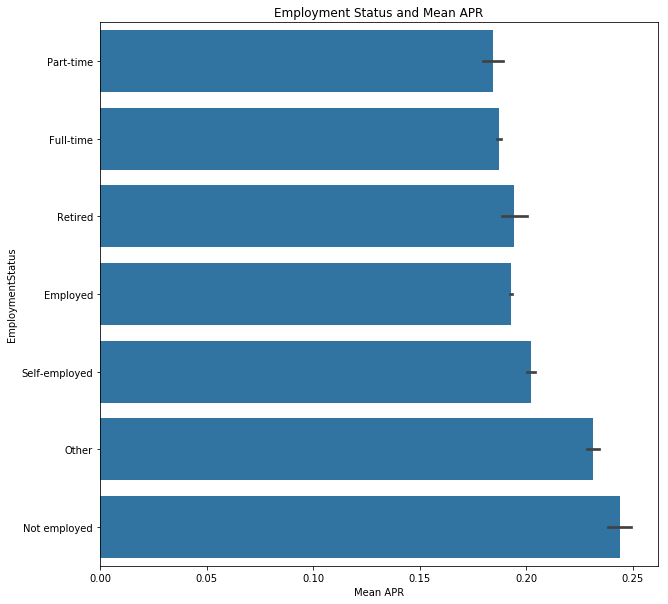

In [25]:
status_order = df.groupby("EmploymentStatus").mean().sort_values(by="BorrowerAPR").index
fig, ax = plt.subplots(figsize=(10,10));
sb.barplot(data=df, ax=ax, x='BorrowerRate', y='EmploymentStatus', color=base_color, order=status_order);
plt.title("Employment Status and Mean APR");
plt.xlabel("Mean APR");

## APRs vs Categorical Variables
### Category

The average loan APR for buying a boat is the lowest of all categories, and loans like Auto are one of the highest. Buying a boat being a less frequent and niche market than buying a car, I was expecting the opposite result. One hypothesis for why this happened is that people who buy boats have more money or financial stability and that warrants a lower APR. However, Boat loan borrowers don't have a specially high income. Our assumption was wrong.

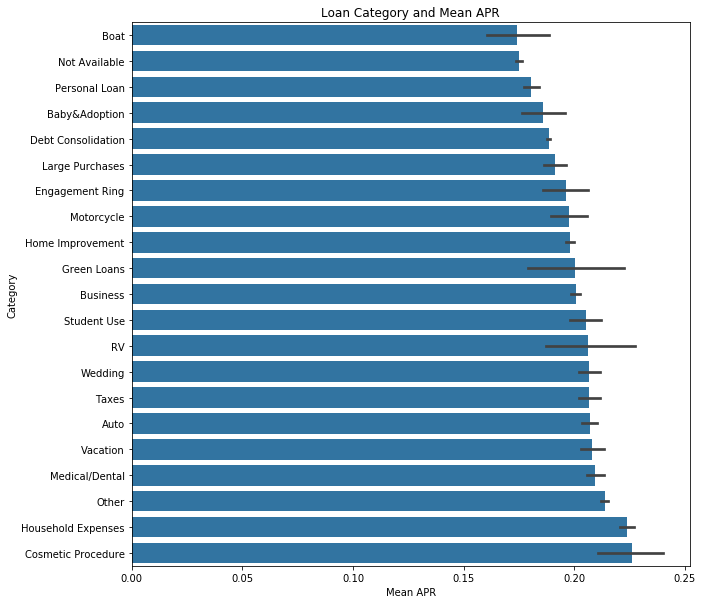

In [26]:
cat_order = df.groupby("Category").mean().sort_values(by="BorrowerRate").index
fig, ax = plt.subplots(figsize=(10,10));
sb.barplot(data=df, ax=ax, x='BorrowerRate', y='Category', color=base_color, order=cat_order);
plt.title("Loan Category and Mean APR");
plt.xlabel("Mean APR");

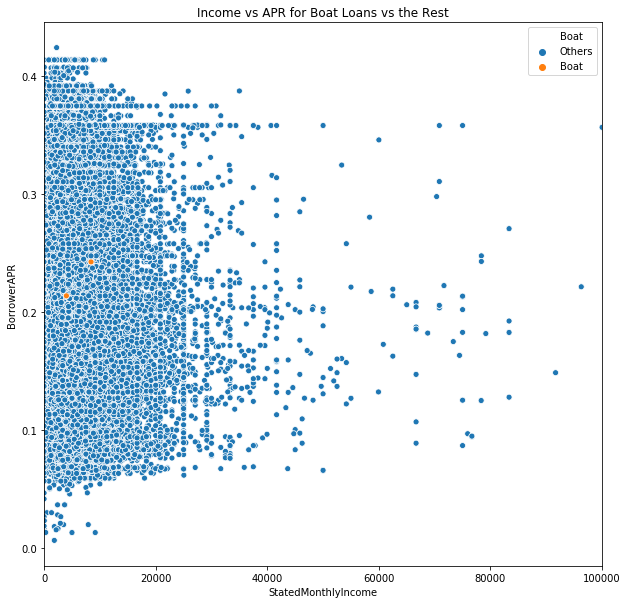

In [28]:
df["Boat"] = "Others"
index = df.query("Category == 'Boat'").index
df.at[index, "Boat"] = "Boat"
fig, ax = plt.subplots(figsize=(10,10))
g = sb.scatterplot(data=df, ax=ax, y='BorrowerAPR', x='StatedMonthlyIncome', hue='Boat')
plt.title("Income vs APR for Boat Loans vs the Rest")
plt.legend(loc='best');
g.set(xlim=(0, 100000));

## APRs vs Categorical Variables
### Loan Status

Past due loans have a higher APR. We can also see that the variability increases in past due loans. This might mean that Prosper Loans was able to predict correctly those loans that would be past due and charged higher for it.

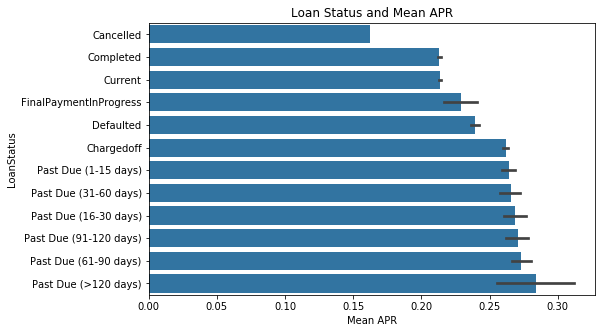

In [15]:
ls_order = df.groupby("LoanStatus").mean().sort_values(by="BorrowerAPR").index
plt.figure(figsize=[8, 5]);
sb.barplot(data=df, x='BorrowerAPR', y='LoanStatus', color=base_color, order=ls_order);
plt.title("Loan Status and Mean APR");
plt.xlabel("Mean APR");

## The Second Peak on APR Distributions

The second peak we find in the distribution of APRs near the 0.35 range is made up of mostly consolidated debt for employees. This set of loans has an APR that is not even correlated to the rate and the yield. The fees associated with this loans are higher than the rest of the dataset.

In [35]:
second_peak = df.query("BorrowerAPR > 0.35 & BorrowerAPR < 0.36")

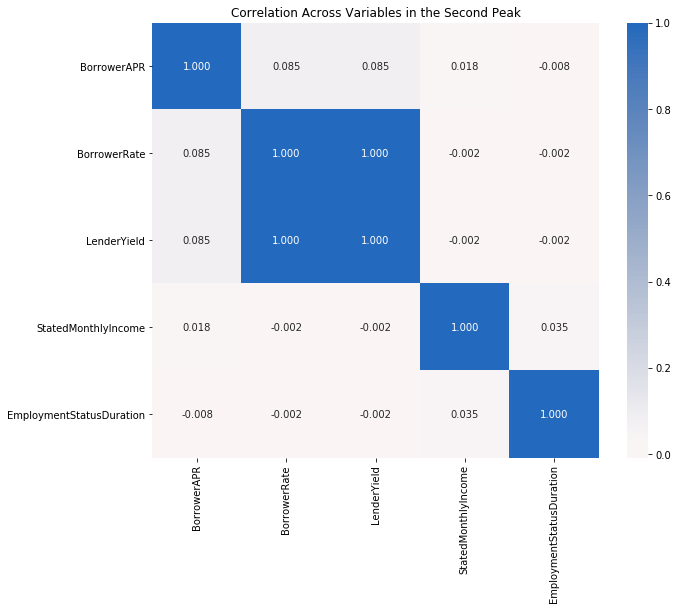

In [45]:
plt.figure(figsize = [10, 8])
plt.title("Correlation Across Variables in the Second Peak")
sb.heatmap(second_peak[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

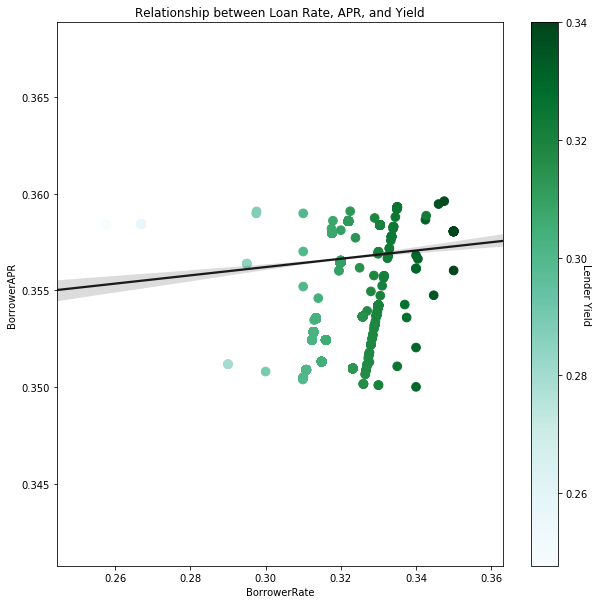

In [47]:
plt.figure(figsize = [10, 10])
points = plt.scatter(second_peak["BorrowerRate"], second_peak["BorrowerAPR"],
                     c=second_peak["LenderYield"], s=75, cmap="BuGn")
plt.title("Relationship between Loan Rate, APR, and Yield");
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('Lender Yield', rotation=270)
sb.regplot(data=second_peak, x='BorrowerRate', y='BorrowerAPR', scatter=False, color=".1")

### The differences between the APR and the Rate is the fees. By measuring the differences in the total dataset vs the difference in the second peak, we can see that the second fee has higher fees.

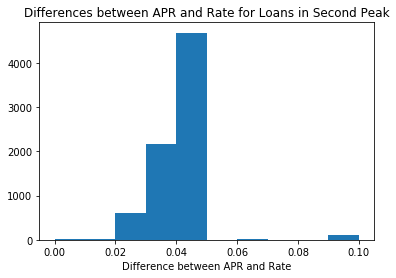

In [49]:
diff_second_peak = second_peak["BorrowerAPR"] - second_peak["BorrowerRate"]
plt.hist(x=diff_second_peak, bins=np.arange(0, 0.1+0.01,0.01));
plt.title("Differences between APR and Rate for Loans in Second Peak");
plt.xlabel("Difference between APR and Rate");

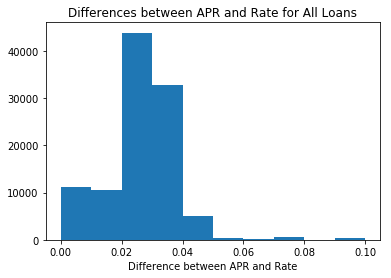

In [50]:
diff_total = df["BorrowerAPR"] - df["BorrowerRate"]
plt.hist(x=diff_total, bins=np.arange(0, 0.1+0.01,0.01));
plt.title("Differences between APR and Rate for All Loans");
plt.xlabel("Difference between APR and Rate");